In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter('ignore')
from mpl_toolkits.basemap import Basemap
import sweetviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

In [4]:
dataFrame = pd.read_csv('vehicles.csv')
dataFrame.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


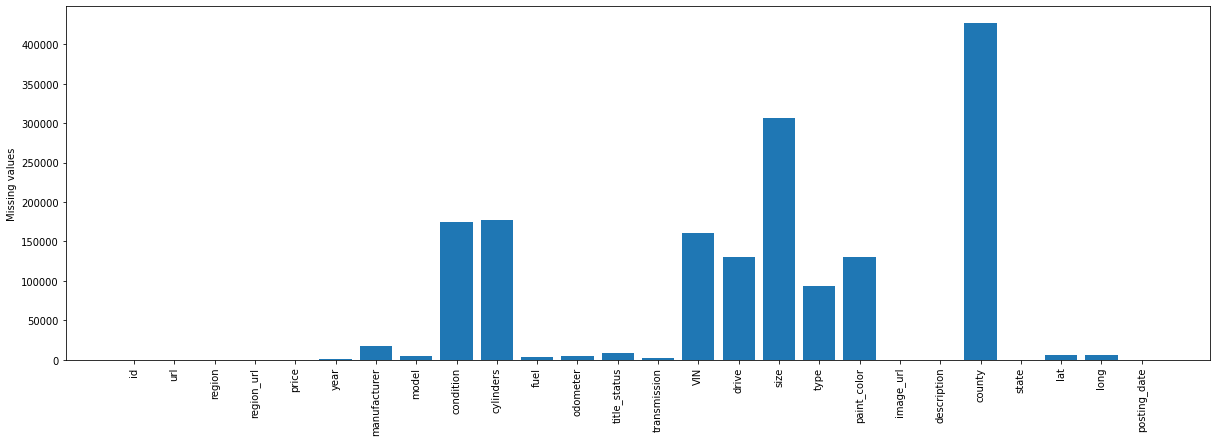

In [5]:
plt.figure(figsize = (20.5, 6.5))
plt.bar(dataFrame.columns, dataFrame.isna().sum())
plt.tick_params('x',labelrotation=90)
plt.ylabel('Missing values')
plt.show()

In [6]:
columnsToDrop = ['id', 'region', 'url', 'region_url', 'description', 'image_url', 'lat', 'long', 'posting_date', 'county', 'VIN', 'size']
dataFrame.drop(columnsToDrop, axis = 1, inplace = True)

In [7]:
dataFrame = dataFrame[(dataFrame.price >= 1000) & (dataFrame.price <= 200000)]
dataFrame.shape

(380441, 14)

In [8]:
dataFrame.dropna(inplace = True)
dataFrame.shape

(109348, 14)

In [9]:
report = sweetviz.analyze([dataFrame, 'Cars'], target_feat='price')
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
typeEncoder = LabelEncoder()
manufacturerEncoder = LabelEncoder()
colorEncoder = LabelEncoder()
driveEncoder = LabelEncoder()
fuelEncoder = LabelEncoder()
modelEncoder = LabelEncoder()
titleStatusEncoder = LabelEncoder()
transmissionEncoder = LabelEncoder()
conditionEncoder = LabelEncoder()
stateEncoder = LabelEncoder()

dataFrame["type"] = typeEncoder.fit_transform(dataFrame['type'])
dataFrame["manufacturer"] = manufacturerEncoder.fit_transform(dataFrame['manufacturer'])
dataFrame['paint_color'] = colorEncoder.fit_transform(dataFrame['paint_color'])
dataFrame['drive'] = driveEncoder.fit_transform(dataFrame['drive'])
dataFrame["fuel"] = fuelEncoder.fit_transform(dataFrame['fuel'])
dataFrame["title_status"] = titleStatusEncoder.fit_transform(dataFrame['title_status'])
dataFrame['transmission'] = transmissionEncoder.fit_transform(dataFrame['transmission'])
dataFrame['condition'] = conditionEncoder.fit_transform(dataFrame['condition'])
dataFrame['state'] = stateEncoder.fit_transform(dataFrame['state'])
dataFrame['model'] = modelEncoder.fit_transform(dataFrame['model'])

In [11]:
dataFrame['cylinders']=dataFrame['cylinders'].apply(lambda x:x.split(' ')[0] if x!="other" else 0)
dataFrame.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,15000,2013.0,13,4513,0,6,2,128000.0,0,0,2,10,0,1
32,27990,2012.0,14,8840,2,8,2,68696.0,0,2,0,8,0,1
33,34590,2016.0,7,8963,2,6,2,29499.0,0,2,0,8,9,1
34,35000,2019.0,38,9625,0,6,2,43000.0,0,0,0,10,5,1
35,29990,2016.0,7,2905,2,6,2,17302.0,0,2,0,8,8,1


In [12]:
X = dataFrame.drop('price', axis = 1)
Y = dataFrame['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25)

In [13]:
def train(x, y, model):
    model.fit(x,y)
    return model

def score(x, y, model):
    return model.score(x, y)

In [14]:
ModelLinearRegression = train(X_train, y_train, LinearRegression())
print("Linear Regression : ",score(X_test, y_test, ModelLinearRegression))

Linear Regression :  0.40423268065738005


In [29]:
ModelRandomForest = train(X_train, y_train, RandomForestRegressor())
print("Random Forest : ",score(X_test, y_test, ModelRandomForest))

Random Forest :  0.8972148205746237


In [18]:
ModelKNN = train(X_train, y_train, KNeighborsRegressor())
print("Random Forest : ",score(X_test, y_test, ModelKNN))

Random Forest :  0.5807781774119936


In [28]:
scores = cross_val_score(RandomForestRegressor(), X, Y, cv=3)
scores

array([0.80506802, 0.88206143, 0.862469  ])